Importing required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Activation,Dense,Dropout,BatchNormalization

In [2]:
os.listdir()

['__notebook__.ipynb']

In [3]:
os.listdir('../input/multiclass-weather-dataset/dataset')

['cloudy', 'sunrise', 'alien_test', 'shine', 'test.csv', 'foggy', 'rainy']

Loading Images

In [4]:
l=['cloudy','foggy','rainy','shine','sunrise']
def load_imgs(impath,l):
    imgs=[]
    label=[]
    for i in l:
        l2=os.listdir(impath+'/'+i)
        for j in l2:
            c=0
            img=Image.open(impath+i+'/'+j).convert('RGB')
            img=img.resize(size=(50,50))
            imgs.append(np.array(img))
            label.append(i)
            del img
    %matplotlib inline
    plt.figure(figsize=(10,10))
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(imgs[i],cmap="gray")
        plt.axis("off")
    plt.show()
    return np.array(imgs),label


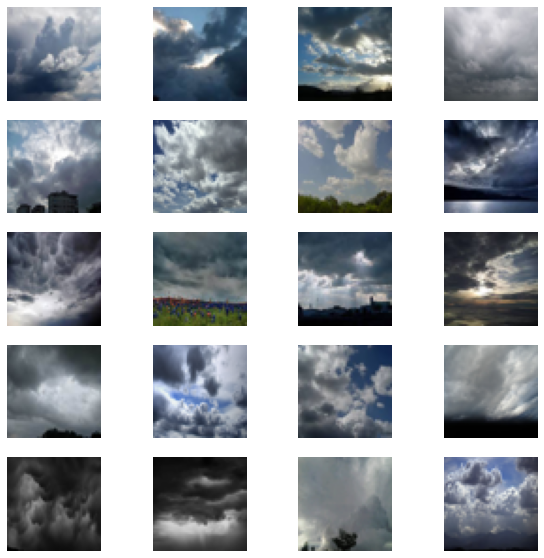

((1500, 50, 50, 3), 1500)

In [5]:
x,y=load_imgs('../input/multiclass-weather-dataset/dataset/',l)
x.shape,len(y)

In [6]:
y[:15]

['cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy']

Converting y into categorical values

In [7]:
t=pd.Series(y,dtype='category').cat.codes
t

0       0
1       0
2       0
3       0
4       0
       ..
1495    4
1496    4
1497    4
1498    4
1499    4
Length: 1500, dtype: int8

Splitting data into testing and training parts

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.25,random_state=True)
x_train.shape,len(y_train)

((1125, 50, 50, 3), 1125)

In [9]:
x_test.shape,len(y_test)

((375, 50, 50, 3), 375)

In [10]:
x_train.shape[1:]

(50, 50, 3)

Building a CNN Model

In [11]:
model=Sequential()
model.add(Conv2D(32,activation="relu",kernel_size=3,input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,activation="relu",kernel_size=3))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,activation="relu",kernel_size=3))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

2023-01-08 06:40:03.950382: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,epochs=25)

2023-01-08 06:40:04.281073: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
36/36 [==============================] - 2s 44ms/step - loss: 11.0626 - accuracy: 0.4196
Epoch 2/25
36/36 [==============================] - 2s 44ms/step - loss: 0.8198 - accuracy: 0.7040
Epoch 3/25
36/36 [==============================] - 2s 45ms/step - loss: 0.6962 - accuracy: 0.7591
Epoch 4/25
36/36 [==============================] - 2s 43ms/step - loss: 0.5744 - accuracy: 0.7769
Epoch 5/25
36/36 [==============================] - 2s 45ms/step - loss: 0.5115 - accuracy: 0.8116
Epoch 6/25
36/36 [==============================] - 2s 43ms/step - loss: 0.4568 - accuracy: 0.8302
Epoch 7/25
36/36 [==============================] - 2s 43ms/step - loss: 0.3601 - accuracy: 0.8622
Epoch 8/25
36/36 [==============================] - 2s 43ms/step - loss: 0.2635 - accuracy: 0.9076
Epoch 9/25
36/36 [==============================] - 2s 43ms/step - loss: 0.2082 - accuracy: 0.9244
Epoch 10/25
36/36 [==============================] - 2s 68ms/step - loss: 0.1717 - accuracy: 0.9467
Epoch 11

In [14]:
y_pred = np.argmax(model.predict(x_test),axis=1)
y_pred[:3]

array([0, 0, 4])

In [15]:
y_test[:3]

91      0
75      0
1264    4
dtype: int8

In [16]:
_,acc = model.evaluate(x_test,y_pred)
print('Accuracy: %.2f' % (acc*100))

12/12 [==============================] - 0s 14ms/step - loss: 0.0976 - accuracy: 1.0000
Accuracy: 100.00


In [17]:
_,acc = model.evaluate(x_test,y_test)
acc*100

12/12 [==============================] - 0s 15ms/step - loss: 1.1102 - accuracy: 0.7813


78.1333327293396

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7813333333333333

In [19]:
def names(num):
    return l[num]

In [20]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((50,50)))
    x.flatten
    x = x.reshape(1,50,50,3)
    r = model.predict_on_batch(x)
    classification = np.where(r == np.amax(r))[1][0]
    imshow(img)
    print(str(r[0][classification]*100) + '% Confidence ' + names(classification))

99.99979734420776% Confidence sunrise


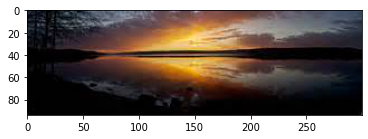

In [21]:
img = Image.open(r"../input/multiclass-weather-dataset/dataset/alien_test/sunrise_2.jpg").convert('RGB')
Prediction(img)

99.53670501708984% Confidence rainy


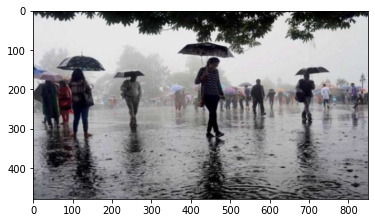

In [22]:
img = Image.open(r"../input/multiclass-weather-dataset/dataset/alien_test/rain_5.jpg").convert('RGB')
Prediction(img)